# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *7장 인공신경망기초 코드*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 7.1 뇌의 동작을 흉내내자 - 연결주의자의 목표

### 7.2 학습할 수 있는 신경 모델 - 퍼셉트론

### LAB 7-1: AND / OR 연산을 수행하는 퍼셉트론

In [ ]:
import numpy as np

W, b = np.array([0.5, 0.5]), -0.7

In [ ]:
def perceptron(x1, x2):
    x = np.array([x1, x2])
    tmp = np.sum( W * x ) + b
    if tmp <= 0: return -1
    else: return 1

In [ ]:
print('--- 퍼셉트론으로 구현한 AND 게이트 ---')
for xs in [(-1, -1), (-1, 1), (1, -1), (1, 1)]:
    y = perceptron(xs[0], xs[1])
    print(xs, ': ', y)

--- 퍼셉트론으로 구현한 AND 게이트 ---
(-1, -1) :  -1
(-1, 1) :  -1
(1, -1) :  -1
(1, 1) :  1


In [ ]:
W, b = np.array([0.7, 0.7]), .5

In [ ]:
print('--- 퍼셉트론으로 구현한 OR 게이트 ---')
for xs in [(-1, -1), (-1, 1), (1, -1), (1, 1)]:
    y = perceptron(xs[0], xs[1])
    print(xs, ': ', y)

--- 퍼셉트론으로 구현한 OR 게이트 ---
(-1, -1) :  -1
(-1, 1) :  1
(1, -1) :  1
(1, 1) :  1


### 7.3 학습의 원리 - 연결 강도의 변경

### LAB 7-2: 논리합을 수행하는 퍼셉트론 만들기

In [ ]:
import numpy as np

W, b = np.array([0, 0]), 0.0
learning_rate = 0.01  

In [ ]:
def activation(s):
    if s > 0: return 1
    elif s < 0: return -1
    return 0

In [ ]:
def out(x) :
    return activation (W.dot(x) + b)

In [ ]:
def train(x0, x1, target):
    global W, b
    X = np.array([x0, x1])
    y = out(X)

    ### 예측이 맞으면 아무것도 하지 않음-------------------------------------
    if target == y: return False         # 가중치가 변경되지 않았음을 반환
    ### 예측이 틀리면 학습 실시---------------------------------------------
    print('가중치 수정전 target :{} y:{} b:{} W:{}'.format(target, y, b, W))
    W = W + learning_rate * X * target   # 입력x출력 비례하여 가중치 변경
    b = b + learning_rate * 1 * target   # 편향: 입력이 1이라고 볼 수 있음
    print('가중치 수정후 target :{} y:{} b:{} W:{}'.format(target, y, b, W))
    return True 

In [ ]:
def predict(inputs):
    outputs = []
    for x in inputs:
        outputs.append (out(x))
    return outputs

In [ ]:
adjusted = 0
for i in range(100):
    adjusted += train(-1,-1, -1)    # 훈련 데이터 1
    adjusted += train(-1, 1,  1)    # 훈련 데이터 2
    adjusted += train( 1,-1,  1)    # 훈련 데이터 3
    adjusted += train( 1, 1,  1)    # 훈련 데이터 4
    print("iteration -------------", i)
    if not adjusted: break  # 모든 훈련에 대해 가중치 변화 없으면 학습종료
    adjusted = 0

가중치 수정전 target :-1 y:0 b:0.0 W:[0 0]
가중치 수정후 target :-1 y:0 b:-0.01 W:[0.01 0.01]
가중치 수정전 target :1 y:-1 b:-0.01 W:[0.01 0.01]
가중치 수정후 target :1 y:-1 b:0.0 W:[0.   0.02]
가중치 수정전 target :1 y:-1 b:0.0 W:[0.   0.02]
가중치 수정후 target :1 y:-1 b:0.01 W:[0.01 0.01]
iteration ------------- 0
iteration ------------- 1


In [ ]:
X = [[-1, -1], [-1, 1], [1, -1], [1,1]]
yhat = predict(X)
print('x0 x1  y')
for i in range(len(X)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], yhat[i]))

x0 x1  y
-1 -1 -1
-1  1  1
 1 -1  1
 1  1  1


### LAB 7-3 : 다양한 논리 연산이 가능하게 퍼셉트론 훈련하기

In [ ]:
adjusted = 0
for i in range(100):
    adjusted += train(-1,-1, -1)    # 훈련 데이터 1
    adjusted += train(-1, 1, -1)    # 훈련 데이터 2
    adjusted += train( 1,-1, -1)    # 훈련 데이터 3
    adjusted += train( 1, 1,  1)    # 훈련 데이터 4
    print("iteration -------------", i)
    if not adjusted: break  # 모든 훈련에 대해 가중치 변화 없으면 학습종료
    adjusted = 0 

가중치 수정전 target :-1 y:1 b:0.01 W:[0.01 0.01]
가중치 수정후 target :-1 y:1 b:0.0 W:[0.02 0.  ]
가중치 수정전 target :-1 y:1 b:0.0 W:[0.02 0.  ]
가중치 수정후 target :-1 y:1 b:-0.01 W:[0.01 0.01]
iteration ------------- 0
iteration ------------- 1


In [ ]:
X = [[-1, -1], [-1, 1], [1, -1], [1,1]]
yhat = predict(X)
print('x0 x1  y')
for i in range(len(X)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], yhat[i]))

x0 x1  y
-1 -1 -1
-1  1 -1
 1 -1 -1
 1  1  1


### NAND 구현

In [ ]:
adjusted = 0
for i in range(100):
    adjusted += train(-1,-1,  1)    # 훈련 데이터 1
    adjusted += train(-1, 1,  1)    # 훈련 데이터 2
    adjusted += train( 1,-1,  1)    # 훈련 데이터 3
    adjusted += train( 1, 1, -1)    # 훈련 데이터 4
    print("iteration -------------", i)
    if not adjusted: break  # 모든 훈련에 대해 가중치 변화 없으면 학습종료
    adjusted = 0 

가중치 수정전 target :1 y:-1 b:-0.01 W:[0.01 0.01]
가중치 수정후 target :1 y:-1 b:0.0 W:[0. 0.]
가중치 수정전 target :1 y:0 b:0.0 W:[0. 0.]
가중치 수정후 target :1 y:0 b:0.01 W:[-0.01  0.01]
가중치 수정전 target :1 y:-1 b:0.01 W:[-0.01  0.01]
가중치 수정후 target :1 y:-1 b:0.02 W:[0. 0.]
가중치 수정전 target :-1 y:1 b:0.02 W:[0. 0.]
가중치 수정후 target :-1 y:1 b:0.01 W:[-0.01 -0.01]
iteration ------------- 0
iteration ------------- 1


In [ ]:
X = [[-1, -1], [-1, 1], [1, -1], [1,1]]
yhat = predict(X)
print('x0 x1  y')
for i in range(len(X)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], yhat[i]))

x0 x1  y
-1 -1  1
-1  1  1
 1 -1  1
 1  1 -1


### 도전문제 7.1 XOR의 진리표를 이용하여 퍼셉트론을 학습시켜 보자

In [ ]:
# XOR 진리표는 학습이 되지 않음!!
adjusted = 0
for i in range(100):
    adjusted += train(-1,-1, -1)    # 훈련 데이터 1
    adjusted += train(-1, 1,  1)    # 훈련 데이터 2
    adjusted += train( 1,-1,  1)    # 훈련 데이터 3
    adjusted += train( 1, 1, -1)    # 훈련 데이터 4
    print("iteration -------------", i)
    if not adjusted: break  # 모든 훈련에 대해 가중치 변화 없으면 학습종료
    adjusted = 0 

가중치 수정전 target :-1 y:1 b:0.01 W:[-0.01 -0.01]
가중치 수정후 target :-1 y:1 b:0.0 W:[0. 0.]
가중치 수정전 target :1 y:0 b:0.0 W:[0. 0.]
가중치 수정후 target :1 y:0 b:0.01 W:[-0.01  0.01]
가중치 수정전 target :1 y:-1 b:0.01 W:[-0.01  0.01]
가중치 수정후 target :1 y:-1 b:0.02 W:[0. 0.]
가중치 수정전 target :-1 y:1 b:0.02 W:[0. 0.]
가중치 수정후 target :-1 y:1 b:0.01 W:[-0.01 -0.01]
iteration ------------- 0
가중치 수정전 target :-1 y:1 b:0.01 W:[-0.01 -0.01]
가중치 수정후 target :-1 y:1 b:0.0 W:[0. 0.]
가중치 수정전 target :1 y:0 b:0.0 W:[0. 0.]
가중치 수정후 target :1 y:0 b:0.01 W:[-0.01  0.01]
가중치 수정전 target :1 y:-1 b:0.01 W:[-0.01  0.01]
가중치 수정후 target :1 y:-1 b:0.02 W:[0. 0.]
가중치 수정전 target :-1 y:1 b:0.02 W:[0. 0.]
가중치 수정후 target :-1 y:1 b:0.01 W:[-0.01 -0.01]
iteration ------------- 1
가중치 수정전 target :-1 y:1 b:0.01 W:[-0.01 -0.01]
가중치 수정후 target :-1 y:1 b:0.0 W:[0. 0.]
가중치 수정전 target :1 y:0 b:0.0 W:[0. 0.]
가중치 수정후 target :1 y:0 b:0.01 W:[-0.01  0.01]
가중치 수정전 target :1 y:-1 b:0.01 W:[-0.01  0.01]
가중치 수정후 target :1 y:-1 b:0.02 W:[0. 0.]
가중치 수정전 target

### 7.4 퍼셉트론, 연결주의가 누린 첫 영예와 긴 좌절

### 7.5 퍼셉트론이 XOR를 풀 수 있게 만드는 방법은?


### LAB 7-4 : 입력 다항화로 XOR를 해결해 보기

In [ ]:
import numpy as np

W = np.array([0, 0, 0, 0])
learning_rate = 0.01 

In [ ]:
def activation(s):
    if s > 0: return 1
    elif s < 0: return -1
    return 0

In [ ]:
def out(polyX) :
    return activation (W.dot(polyX))

In [ ]:
def train(x0, x1, target):
    global W
    polyX = np.array([x0, x1, x0*x1, 1])
    y = out(polyX)

    ### 예측이 맞으면 아무것도 하지 않음-------------------------------------
    if target == y: return 0               # 가중치가 변경되지 않았음을 반환
    ### 예측이 틀리면 학습 실시---------------------------------------------
    print('가중치 수정전 target :{} y:{} W:{}'.format(target, y, W))
    W = W + learning_rate * polyX * target # 입력x목표값에 비례하여 변경
    print('가중치 수정후 target :{} y:{} W:{}'.format(target, y, W))
    return 1                               # 가중치가 변경되었음을 반환

In [ ]:
def predict(inputs):
    outputs = []
    for x in inputs:
        polyX = np.array([x[0], x[1], x[0]*x[1], 1])
        outputs.append (out(polyX))
    return outputs

In [ ]:
adjusted = 0
for i in range(100):
    adjusted += train(-1,-1, -1)    # 훈련 데이터 1
    adjusted += train(-1, 1,  1)    # 훈련 데이터 2
    adjusted += train( 1,-1,  1)    # 훈련 데이터 3
    adjusted += train( 1, 1, -1)    # 훈련 데이터 4
    print("iteration -------------", i)
    if not adjusted: break  # 모든 훈련에 대해 가중치 변화 없으면 학습종료
    adjusted = 0

X = [[-1, -1], [-1, 1], [1, -1], [1,1]]
yhat = predict(X)
print('x0 x1  y')
for i in range(len(X)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], yhat[i]))

가중치 수정전 target :-1 y:0 W:[0 0 0 0]
가중치 수정후 target :-1 y:0 W:[ 0.01  0.01 -0.01 -0.01]
가중치 수정전 target :1 y:0 W:[ 0.01  0.01 -0.01 -0.01]
가중치 수정후 target :1 y:0 W:[ 0.    0.02 -0.02  0.  ]
가중치 수정전 target :1 y:0 W:[ 0.    0.02 -0.02  0.  ]
가중치 수정후 target :1 y:0 W:[ 0.01  0.01 -0.03  0.01]
가중치 수정전 target :-1 y:1 W:[ 0.01  0.01 -0.03  0.01]
가중치 수정후 target :-1 y:1 W:[ 0.    0.   -0.04  0.  ]
iteration ------------- 0
iteration ------------- 1
x0 x1  y
-1 -1 -1
-1  1  1
 1 -1  1
 1  1 -1


### 7.6 다층 퍼셉트론의 학습 1 - 오차를 줄이도록 연결 강도를 고치자

### 7.7 다층 퍼셉트론의 학습 2 - 오차를 아래로 전파하자

### 7.8 역전파 알고리즘에 대한 직관적 이해

### 7.9 계층 단위로 신호 전파하기

### 7.10 역전파 알고리즘의 요약

### LAB 7-5 : XOR 연산이 가능한 다층 퍼셉트론 만들기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

U: 연결강도 $\mathbf U$

W: 연결강도 $\mathbf W$

learning_rate: 학습률 $\eta$

In [ ]:
U = np.random.rand(2,3)   # 연결강도 
W = np.random.rand(3,2)   # 연결강도 
learning_rate = 1.0       # 학습률 

In [ ]:
def sigmoid(v):
    return 1 / (1+np.exp(-v))

def derivative_sigmoid(v):
    s = sigmoid(v)
    return s*(1-s)

순전파시 계산될 값들 : $\mathbf h^{\Sigma} ~ \mathbf h^{\phi} ~ \mathbf h^{{\phi}'}$

역전파시 계산될 값들 : $\mathbf e^h ~ \delta^h$


순전파시 계산될 값들 : $\mathbf y^{\Sigma} ~ \mathbf y^{\phi} ~ \mathbf y^{{\phi}'}$

역전파시 계산될 값들 : $ \mathbf e^y ~ \delta^y $

In [ ]:
input = np.zeros(2)

# 순전파시 계산될 값들 
h_sum, h_out, h_deriv = np.zeros(3), np.zeros(3), np.zeros(3)
# 역전파시 계산될 값들 
h_error, h_delta = np.zeros(3), np.zeros(3)                  

# 순전파시 계산될 값들 
y_sum, y_out, y_deriv = np.zeros(2), np.zeros(2), np.zeros(2)
# 역전파시 계산될 값들 
y_error, y_delta = np.zeros(2), np.zeros(2)

은닉층에서 합산된 값: $\mathbf h^{\Sigma} = \mathbf U^{\mathrm T} \mathbf x$

은닉층의 활성화 값: $\mathbf h^{\phi} = \phi(\mathbf h^{\Sigma})$

은닉층 활성화 미분치: $\mathbf h^{{\phi}'} = \phi'(\mathbf h^{\Sigma})$

In [ ]:
def forward_xh(x):
    global input, h_sum, h_out, h_deriv
    input = x
    h_sum = U.T.dot(input)                 # 은닉층에서 합산된 값
    h_out = sigmoid(h_sum)                 # 은닉층의 활성화 값
    h_deriv = derivative_sigmoid(h_sum)    # 은닉층 활성화 미분치

출력층에서 합산된 값: $\mathbf y^{\Sigma} = \mathbf W^{\mathrm T} \mathbf x$

출력층의 활성화 값: $\mathbf y^{\phi} = \phi(\mathbf y^{\Sigma})$

출력층 활성화 미분치: $\mathbf y^{{\phi}'} = \phi'(\mathbf y^{\Sigma})$

In [ ]:
def forward_hy():
    global y_sum, y_out, y_deriv
    y_sum = W.T.dot(h_out)                  # 출력층에서 합산된 값
    y_out = sigmoid(y_sum)                  # 출력층의 활성화 값
    y_deriv = derivative_sigmoid(y_sum)     # 출력층의 활성화 미분치

오차 계산: $ \mathbf y^{\phi} - \mathbf t$

In [ ]:
def compute_error(target):
    return y_out - target                   # 오차의 계산

출력층 오차 : $\mathbf e^y$

출력층에서 보내는 델타: $\delta^y = \mathbf y^{{\phi}'} \otimes \mathbf e^y$

연결강도 갱신: $\Delta \mathbf W = \eta \mathbf h^{\phi} {\delta^y}^{\mathrm T}$

In [ ]:
def backward_y(error):
    global y_error, y_delta, W
    y_error = error                                    # 출력층 오차
    y_delta = y_deriv * y_error                        # 출력층에서 보내는 델타
    ## 연결강도 W 수정
    dW = - learning_rate * np.outer(h_out, y_delta)    # 연결강도 갱신: 은닉층 출력과 출력층 델타의 외적
    W = W + dW   

은닉층 오차 : $\mathbf e^h = \mathbf W \delta^y$

은닉층에서 보내는 델타: $\delta^h = \mathbf h^{{\phi}'} \otimes \mathbf e^h$

연결강도 갱신: $\Delta \mathbf U = \eta \mathbf x^{\phi} {\delta^h}^{\mathrm T}$

In [ ]:
def backward_h():
   global h_error, h_delta, U
   h_error = W.dot(y_delta)                             # 은닉층 오차
   h_delta = h_deriv * h_error                          # 은닉층에서 보내는 델타
   ## 연결강도 U 수정
   dU = - learning_rate * np.outer(input, h_delta)      # 연결강도 갱신
   U = U + dU  

In [ ]:
def train(x, target):
    forward_xh(x)
    forward_hy()
    e = compute_error(target)
    backward_y(e)
    backward_h()
    return e**2

In [ ]:
loss = []

for i in range(1000):
    e_accum=0
    true = np.array([1,0])
    false = np.array([0,1])
    e_accum += train(np.array([0,0]), false)    # 훈련 데이터 1 
    e_accum += train(np.array([0,1]), true)     # 훈련 데이터 2
    e_accum += train(np.array([1,0]), true)     # 훈련 데이터 3
    e_accum += train(np.array([1,1]), false)    # 훈련 데이터 4
    loss.append(e_accum)

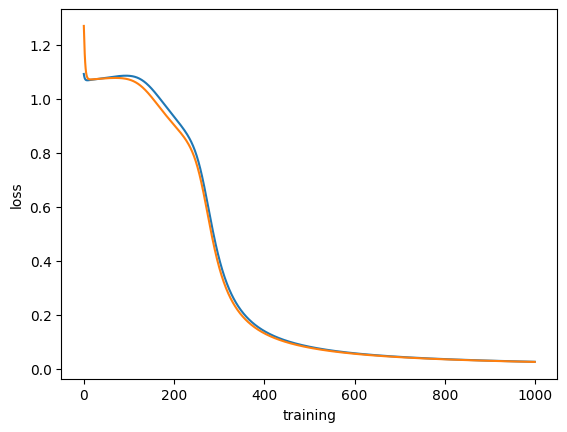

In [ ]:
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('training')
plt.show()

In [ ]:
def test(X):
    y_hat = []
    for x in X:
        forward_xh(x)
        forward_hy()
        y_hat.append(y_out)
    return y_hat

In [ ]:
test(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]))

[array([0.11827764, 0.88265796]),
 array([0.92654019, 0.07282   ]),
 array([0.92604573, 0.07329797]),
 array([0.03582479, 0.96468823])]



### LAB 7-6 : 다층 퍼셉트론으로 비선형 회귀 구현하기

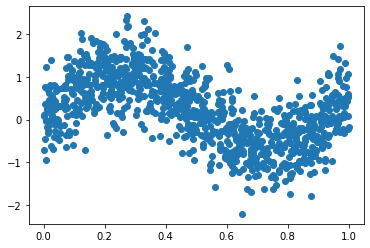

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
plt.scatter(df['x'], df['y'])

In [ ]:
nx, nh1, nh2, ny = 1, 6, 4, 1
U = np.random.randn(nx , nh1)*2
V = np.random.randn(nh1, nh2)*2
W = np.random.randn(nh2, ny)*2
learning_rate = 0.1

In [ ]:
def sigmoid(v):
    return 1 / (1+np.exp(-v))

In [ ]:
input = np.zeros(nx)

h1_out, h1_deriv = np.zeros(nh1), np.zeros(nh1) # 순전파시 계산 - 은닉계층 1
h1_delta = np.zeros(nh1)                        # 역전파시 계산

h2_out, h2_deriv = np.zeros(nh2), np.zeros(nh2) # 순전파시 계산 - 은닉계층 2
h2_delta = np.zeros(nh2)                        # 역전파시 계산

y_out, y_deriv = np.zeros(ny), np.zeros(ny)     # 순전파시 계산 - 출력계층
y_delta = np.zeros(ny)                          # 역전파시 계산

In [ ]:
def forward(x):
    global input, h1_out, h1_deriv, h2_out, h2_deriv, y_out, y_deriv
    input = x
    h1_out = sigmoid ( U.T.dot(input) )          # 은닉계층 1로 전파
    h1_deriv = h1_out * (1 - h1_out)             # 은닉계층 1의 미분

    h2_out = sigmoid ( V.T.dot(h1_out) )         # 은닉계층 2로 전파
    h2_deriv = h2_out * (1 - h2_out)             # 은닉계층 2의 미분
  
    y_out = sigmoid( W.T.dot(h2_out) )           # 출력계층으로 전파
    y_deriv = y_out * (1 - y_out)                # 출력계층의 미분

In [ ]:
def compute_error(target):
    return y_out - target

In [ ]:
def backward(error):
    global y_delta, W, h2_delta, V, h1_delta, U
  
    y_delta = y_deriv * error                         # 출력 계층의 델타
    dW = - learning_rate * np.outer(h2_out, y_delta)  # W의 수정
    W = W + dW

    h2_delta = h2_deriv * W.dot(y_delta)              # 은닉 계층 2의 델타
    dV = - learning_rate * np.outer(h1_out, h2_delta) # V의 수정
    V = V + dV

    h1_delta = h1_deriv * V.dot(h2_delta)             # 은닉 계층 1의 델타
    dU = - learning_rate * np.outer(input, h1_delta)  # U의 수정
    U = U + dV

In [ ]:
def train(x, target):
    forward(x)
    e = compute_error(target)
    backward(e)
    return e**2

In [ ]:
loss = []
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()
for i in range(100):
    e_accum = 0
    for x, y in zip(X, y_label):
        e_accum += train(x, y)
    loss.append(e_accum)

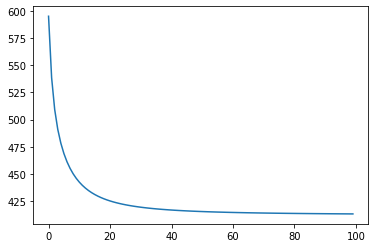

In [ ]:
err_log = np.array(loss).flatten()
plt.plot(err_log)
plt.show()

In [ ]:
def predict(X):
    y_hat = []
    for x in X:
        forward(x)
        y_hat.append(y_out)
    return y_hat

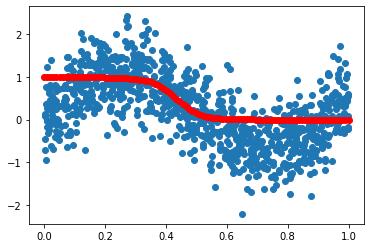

In [ ]:
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

### 7.11 신경망을 쉽게 설계하고 훈련을 실시할 수 있는 도구 활용

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 텐서플로우와 케라스를 사용할 수 있도록 준비
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential( [
    keras.layers.Dense(6, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(1, activation= 'sigmoid'),
])

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=5.0)
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
X = df['x'].to_numpy()[:, np.newaxis]
y_label = df['y'].to_numpy()

In [ ]:
model.fit(X, y_label, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6292
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5879
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5048
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4719
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4149
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4144
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4086
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4088
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4034
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4078
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4022
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4022
Epoch 13/100
32/32 [=================

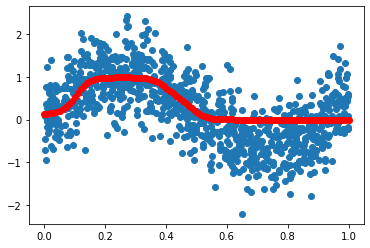

In [ ]:
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')